# Task 2.1: ARMA

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import pandas as pd
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from helper import *
import warnings
import itertools
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### Load data

In [15]:
# Training data
X_train_raw, y_train = load_dataset("../data/training1_no_incidents.csv")

# Optimization data
X_optim_raw, y_optim = load_dataset("../data/training2_with_incidents.csv")

# Test data
X_test_raw, _        = load_dataset("../data/test.csv", has_labels=False)
y_test               = get_test_labels(X_test_raw.index)

# Select sensors to consider
sensors = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1', 'F_PU2', 'F_PU3', 'F_PU4', 
            'F_PU5', 'F_PU6', 'F_PU7', 'F_PU8', 'F_PU9', 'F_PU10', 'F_PU11', 'F_V2', 'P_J280', 'P_J269', 
            'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']

X_train = X_train_raw[sensors].values
X_optim = X_optim_raw[sensors].values
X_test  = X_test_raw[sensors].values


In [16]:
# Load data
df = pd.read_csv("../data/training1_no_incidents.csv")
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
df.set_index('DATETIME', inplace=True)

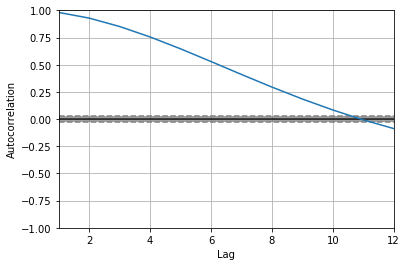

In [19]:
autocorrelation_plot(df['L_T1'], 12)
plt.show()

### As can be seen in this plot, the correlations that are perhaps significant are limited to the first 11 lags. As a result, a good starting point for the AR parameter is 11. 


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.L_T1   No. Observations:                 8760
Model:                ARIMA(11, 1, 0)   Log Likelihood                6440.569
Method:                       css-mle   S.D. of innovations              0.116
Date:                Tue, 04 Jun 2019   AIC                         -12855.138
Time:                        18:25:43   BIC                         -12763.124
Sample:                             1   HQIC                        -12823.786
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.004      0.043      0.966      -0.008       0.008
ar.L1.D.L_T1      1.0364      0.011     97.462      0.000       1.016       1.057
ar.L2.D.L_T1     -0.2559      0.015    -

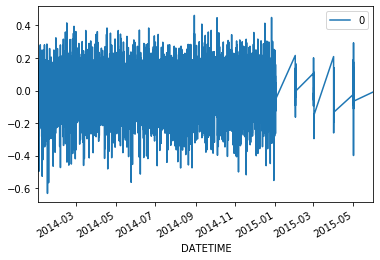

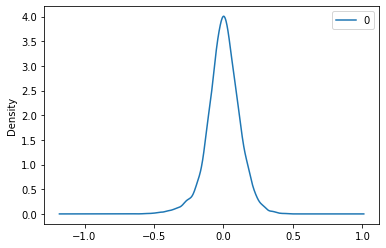

                 0
count  8760.000000
mean      0.000011
std       0.116000
min      -0.632968
25%      -0.064683
50%       0.001881
75%       0.071265
max       0.462180


In [21]:
model = ARIMA(df['L_T1'], order = (11,1,0))
model_fit = model.fit(disp = 0)
print(model_fit.summary())
residual = DataFrame(model_fit.resid)
residual.plot()
plt.show()
residual.plot(kind='kde')
plt.show()
print(residual.describe())